# Churn Modeling, testing Aritifical Neural Nets, Logistic Regression, KNN & LightGBM Classifier 

In [42]:
print('Loading Packages...\n')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import sklearn
assert sklearn.__version__ >= "0.20"
import tensorflow as tf 
from tensorflow import keras 
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
print('Done!')

Loading Packages...

Done!


In [43]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [45]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [46]:
df.groupby(['IsActiveMember', 'HasCrCard']).count()

RowNumber  CustomerId  Surname  CreditScore  \
IsActiveMember HasCrCard                                                
0              0               1401        1401     1401         1401   
               1               3448        3448     3448         3448   
1              0               1544        1544     1544         1544   
               1               3607        3607     3607         3607   

                          Geography  Gender   Age  Tenure  Balance  \
IsActiveMember HasCrCard                                             
0              0               1401    1401  1401    1401     1401   
               1               3448    3448  3448    3448     3448   
1              0               1544    1544  1544    1544     1544   
               1               3607    3607  3607    3607     3607   

                          NumOfProducts  EstimatedSalary  Exited  
IsActiveMember HasCrCard                                          
0              0                   1401             1401    1401  
               1                   3448             3448    3448  
1              0                   1544             1544    1544  
               1                   3607             3607    3607

In [47]:
labels = df['Exited']
features = df.drop(columns=['Exited', 'Geography', 'RowNumber', 'Surname'])

In [48]:
labels[:10]

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

In [49]:
features[:10]

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10
5,15574012,645,Male,44,8,113755.78,2,1,0,149756.71
6,15592531,822,Male,50,7,0.00,2,1,1,10062.80
7,15656148,376,Female,29,4,115046.74,4,1,0,119346.88
8,15792365,501,Male,44,4,142051.07,2,0,1,74940.50
9,15592389,684,Male,27,2,134603.88,1,1,1,71725.73


In [50]:
from sklearn.preprocessing import StandardScaler

features['Gender'].replace('Female', 0, inplace=True)
features['Gender'].replace('Male', 1, inplace=True)

scaler = StandardScaler()
features = scaler.fit_transform(features)

features[:10]

array([[-0.78321342, -0.32622142, -1.09598752,  0.29351742, -1.04175968,
        -1.22584767, -0.91158349,  0.64609167,  0.97024255,  0.02188649],
       [-0.60653412, -0.44003595, -1.09598752,  0.19816383, -1.38753759,
         0.11735002, -0.91158349, -1.54776799,  0.97024255,  0.21653375],
       [-0.99588476, -1.53679418, -1.09598752,  0.29351742,  1.03290776,
         1.33305335,  2.52705662,  0.64609167, -1.03067011,  0.2406869 ],
       [ 0.14476652,  0.50152063, -1.09598752,  0.00745665, -1.38753759,
        -1.22584767,  0.80773656, -1.54776799, -1.03067011, -0.10891792],
       [ 0.65265871,  2.06388377, -1.09598752,  0.38887101, -1.04175968,
         0.7857279 , -0.91158349,  0.64609167,  0.97024255, -0.36527578],
       [-1.62552983, -0.05720525,  0.91241915,  0.4842246 ,  1.03290776,
         0.59732859,  0.80773656,  0.64609167, -1.03067011,  0.86365029],
       [-1.36808046,  1.77417405,  0.91241915,  1.05634615,  0.68712986,
        -1.22584767,  0.80773656,  0.64609167

In [51]:
labels = labels.astype('float32')

In [52]:
f_train, f_test, l_train, l_test = train_test_split(features, labels, test_size=0.2)
f_train, f_val, l_train, l_val = train_test_split(f_train, l_train, test_size=0.2)

In [53]:
Train_acc = []
Test_acc = []
f1 = []

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

log_r = LogisticRegression()
log_r_model = log_r.fit(f_train, l_train)
log_r_pred = log_r_model.predict(f_test)

In [55]:
log_r_error = np.sqrt(mean_squared_error(log_r_pred,l_test))
print('Logistic regression RMSE : ', log_r_error)

Logistic regression RMSE :  0.4312772


In [56]:
log_r_train_acc = cross_val_score(log_r, f_train, l_train, cv = 8, scoring='accuracy')
Train_acc.append(log_r_train_acc.mean())
log_r_test_acc = cross_val_score(log_r, f_test, l_test, cv = 8, scoring='accuracy')
Test_acc.append(log_r_test_acc.mean())

log_r_f1 = f1_score(l_test, log_r_pred, average='weighted')
f1.append(log_r_f1)

In [57]:
from lightgbm import LGBMClassifier

LGBMC = LGBMClassifier()
LGBMC_model = LGBMC.fit(f_train, l_train)
pred_LGBMC = LGBMC_model.predict(f_test)

In [58]:
LGBMC_error = np.sqrt(mean_squared_error(l_test,pred_LGBMC))
print('LightGBM model error: ',LGBMC_error)

LightGBM model error:  0.37549967


In [59]:
LGBMC_train_acc = cross_val_score(LGBMC, f_train, l_train, cv = 8, scoring='accuracy')
Train_acc.append(LGBMC_train_acc.mean())
LGBMC_test_acc = cross_val_score(LGBMC, f_test, l_test, cv = 8, scoring='accuracy')
Test_acc.append(LGBMC_test_acc.mean())

LGBMC_f1 = f1_score(l_test, pred_LGBMC, average='weighted')
f1.append(LGBMC_f1)

In [60]:
from sklearn.neighbors import  KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(f_train, l_train) 
KNN_pred = KNN.predict(f_test)

In [61]:
Kerror = np.sqrt(mean_squared_error(l_test,KNN_pred))
print('KNN model error : ',Kerror)

KNN model error :  0.4207137


In [62]:
KNN_train_acc = cross_val_score(KNN, f_train, l_train, cv = 8, scoring='accuracy')
Train_acc.append(KNN_train_acc.mean())
KNN_test_acc = cross_val_score(KNN, f_test, l_test, cv = 8, scoring='accuracy')
Test_acc.append(KNN_test_acc.mean())

KNN_f1 = f1_score(l_test,KNN_pred, average='weighted')
f1.append(KNN_f1)

In [72]:
mlmodel ={
    'Model' : ['Logistic Regression', 'LGBM Classifier', 'KNN'],
    'Train Accuracy': Train_acc,
    'Test Accuracy': Test_acc,
    'F1 Score': f1    
}

results = pd.DataFrame(mlmodel)
results

,Model,Train Accuracy,Test Accuracy,F1 Score
0,Logistic Regression,0.802812,0.8155,0.771990
1,LGBM Classifier,0.849375,0.8365,0.847141
2,KNN,0.817188,0.8155,0.790452


## Deep Learning Model

In [67]:
ann_model = keras.Sequential([keras.layers.Dense(9, input_shape = (10,)),
                        keras.layers.Dense(7, activation=tf.nn.relu),
                        keras.layers.Dense(1,activation='sigmoid')])

In [68]:
ann_model.compile(optimizer='adam',
                    loss = 'binary_crossentropy',
                    metrics = ['acc'])

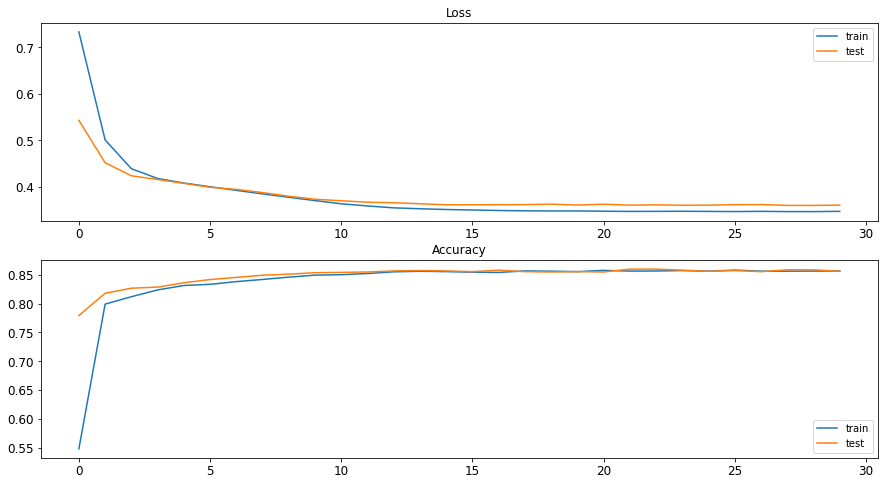

In [69]:
history = ann_model.fit(f_train, l_train, epochs=30, validation_data=(f_val, l_val), verbose=0)

_, train_acc = ann_model.evaluate(f_train, l_train, verbose=0)
_, test_acc = ann_model.evaluate(f_test, l_test, verbose=0)

plt.figure(figsize=(15,8))
ax = plt.subplot(211)
ax.set_title('Loss')
ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.legend()

ax2 = plt.subplot(212)
ax2.set_title('Accuracy')
ax2.plot(history.history['acc'], label='train')
ax2.plot(history.history['val_acc'], label='test')
ax2.legend()
plt.show()

In [70]:
ann_prediction = ann_model.predict(f_test)
score, acc = ann_model.evaluate(f_test, l_test)
print('ANN error :', score)

63/63 [==============================] - 0s 860us/step - loss: 0.3518 - acc: 0.8580
ANN error : 0.3518173098564148


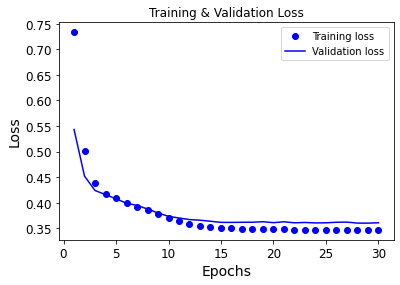

In [71]:
history_dict = history.history
history_dict.keys()

accuracy = history_dict['acc']
validation_accuracy = history_dict['val_acc']
loss = history_dict['loss']
validation_loss = history_dict['val_loss']

epochs = range(1,len(accuracy)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, validation_loss, 'b', label = 'Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()